In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('C://Users//USER//Documents//bosch.csv')

In [3]:
df.head()

,product_id,product_category,region,current_price,optimized_price,demand_forecast,inventory_level,manufacturing_cost,supply_chain_cost,profit_margin,optimization_result
0,232501,Energy and Building Technology,Africa,2117.35,2382.88,5739,2821,936.13,1970.36,-523.61,Unchanged
1,364104,Consumer Goods,Africa,4912.42,4151.10,3359,4509,106.71,1418.87,2625.52,Improved
2,437509,Consumer Goods,Europe,4814.78,3897.92,3882,3032,483.82,233.91,3180.19,Improved
3,847371,Consumer Goods,Europe,3108.46,3334.72,1146,137,485.13,482.99,2366.60,Unchanged
4,921199,Consumer Goods,Europe,531.17,445.91,6083,1116,1354.80,1937.54,-2846.43,Improved


In [4]:
df.isnull().sum()

product_id             0
product_category       0
region                 0
current_price          0
optimized_price        0
demand_forecast        0
inventory_level        0
manufacturing_cost     0
supply_chain_cost      0
profit_margin          0
optimization_result    0
dtype: int64

In [5]:
df.columns

Index(['product_id', 'product_category', 'region', 'current_price',
       'optimized_price', 'demand_forecast', 'inventory_level',
       'manufacturing_cost', 'supply_chain_cost', 'profit_margin',
       'optimization_result'],
      dtype='object')

In [8]:
# 1. Summary statistics
df.describe()

,product_id,current_price,optimized_price,demand_forecast,inventory_level,manufacturing_cost,supply_chain_cost,profit_margin
count,10000.000000,10000.000000,10000.000000,10000.0000,10000.00000,10000.000000,10000.000000,10000.000000
mean,547843.825300,2538.787741,2541.259152,5527.1195,2539.67770,1516.772378,999.630384,24.856390
std,258031.441365,1406.920503,1449.386871,2605.0534,1403.18492,849.454126,575.248898,1782.670538
min,100034.000000,100.020000,85.790000,1000.0000,100.00000,50.000000,20.580000,-4599.990000
25%,325115.500000,1321.495000,1302.660000,3275.2500,1335.00000,773.850000,497.857500,-1272.125000
50%,547874.500000,2554.595000,2517.525000,5530.0000,2530.50000,1511.760000,999.770000,-31.645000
75%,770741.500000,3749.827500,3699.117500,7788.0000,3751.25000,2245.935000,1507.775000,1307.322500
max,999951.000000,4999.920000,5972.800000,9999.0000,5000.00000,2999.880000,1999.990000,5473.240000


In [9]:
correlation_matrix = df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_11216\4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [10]:
correlation_matrix

,product_id,current_price,optimized_price,demand_forecast,inventory_level,manufacturing_cost,supply_chain_cost,profit_margin
product_id,1.000000,0.008969,0.009092,0.005986,-0.008240,-0.018915,0.003237,0.015361
current_price,0.008969,1.000000,0.972623,-0.009448,0.000392,-0.001657,-0.010215,0.794869
optimized_price,0.009092,0.972623,1.000000,-0.008971,-0.002878,-0.002486,-0.006463,0.816312
demand_forecast,0.005986,-0.009448,-0.008971,1.000000,0.005890,0.001264,0.008786,-0.010731
inventory_level,-0.008240,0.000392,-0.002878,0.005890,1.000000,-0.006757,0.005789,-0.000988
manufacturing_cost,-0.018915,-0.001657,-0.002486,0.001264,-0.006757,1.000000,0.007993,-0.481107
supply_chain_cost,0.003237,-0.010215,-0.006463,0.008786,0.005789,0.007993,1.000000,-0.331753
profit_margin,0.015361,0.794869,0.816312,-0.010731,-0.000988,-0.481107,-0.331753,1.000000


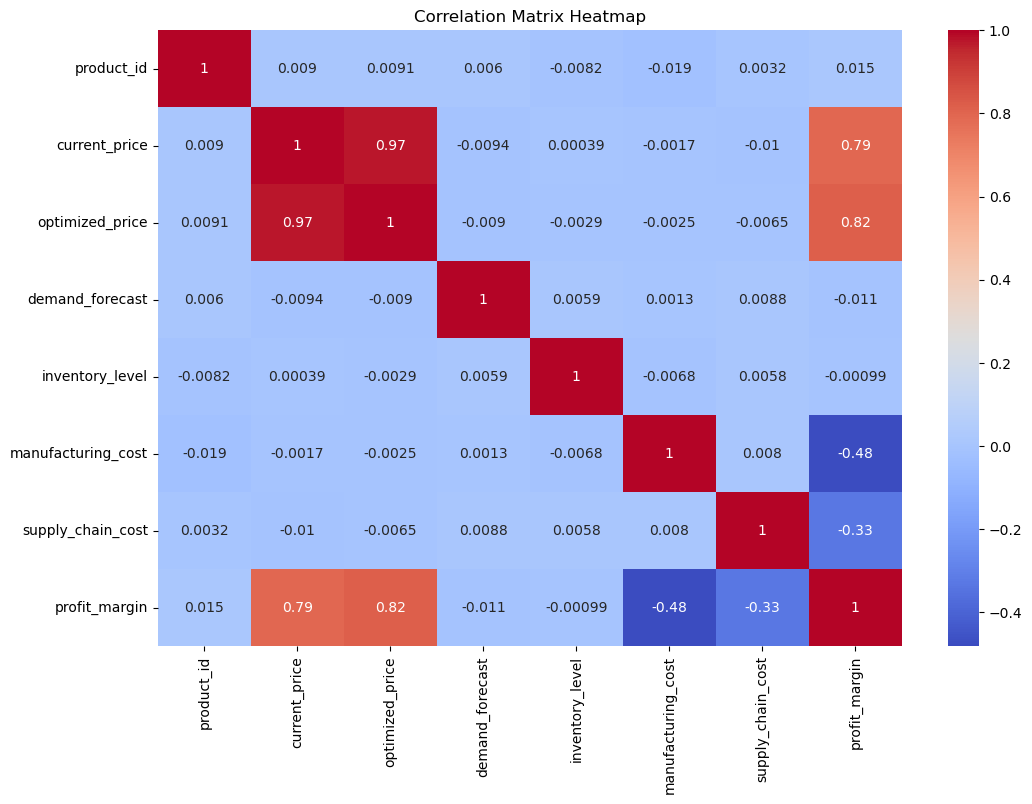

In [11]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

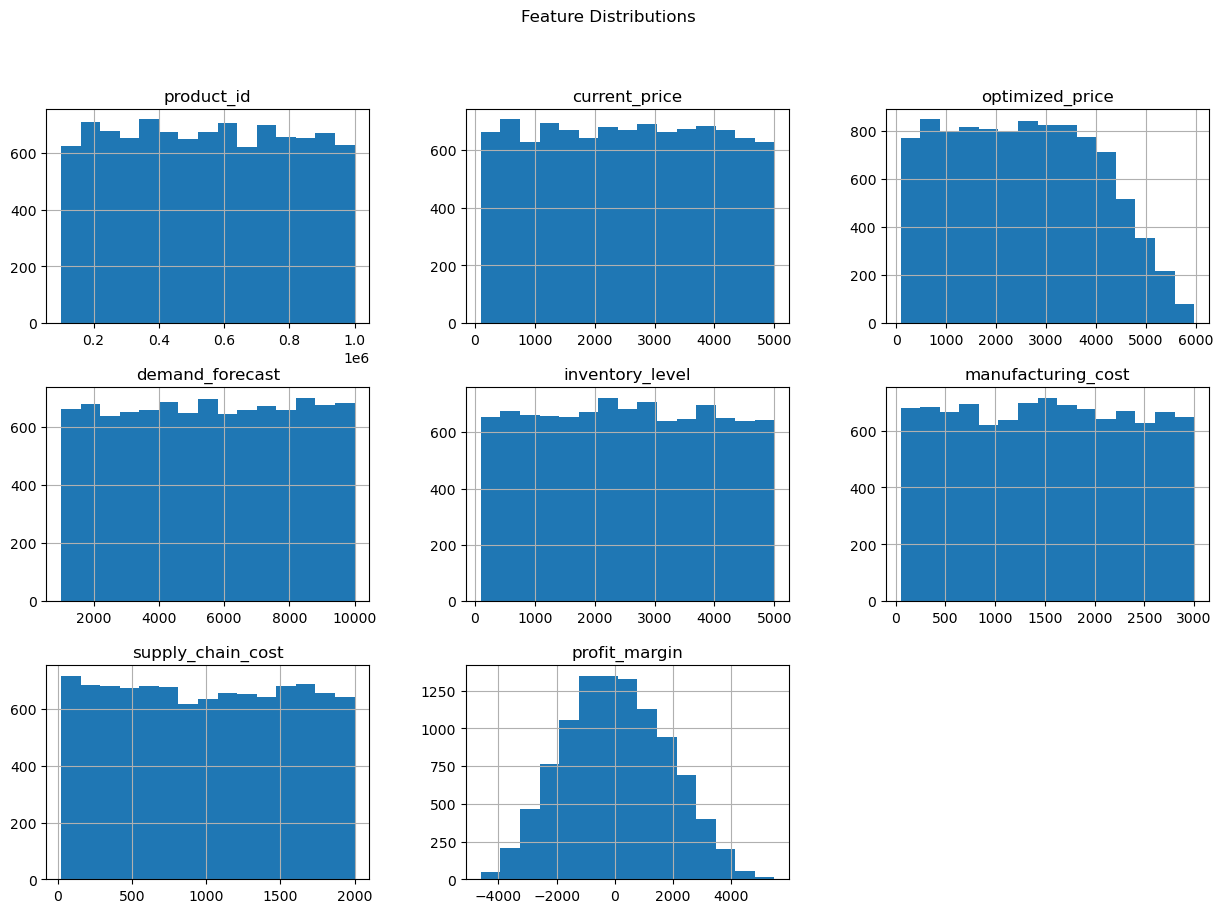

In [13]:
# 3. Feature Distributions
# Plot histograms for numeric features
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

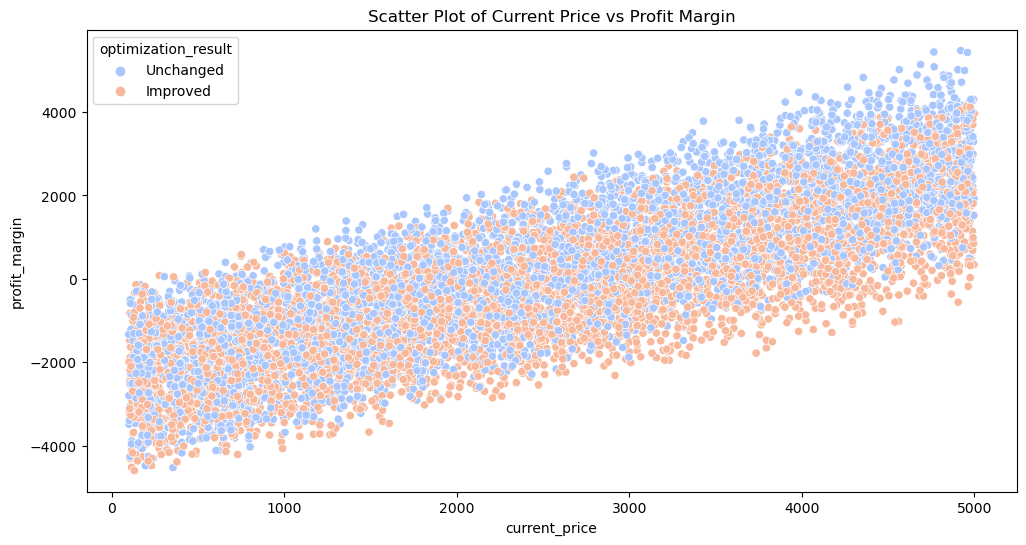

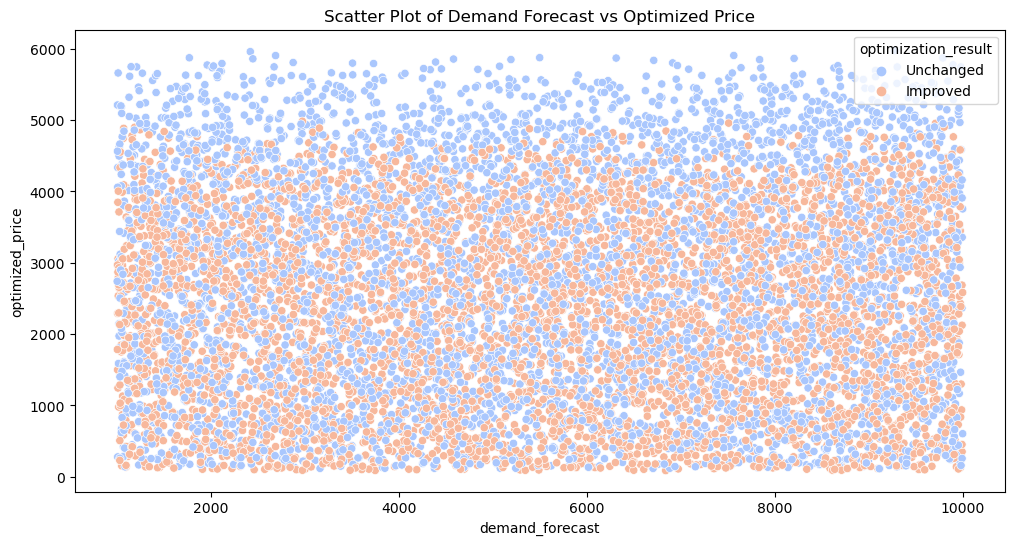

In [15]:
# 5. Scatter plots to observe relationships between key variables
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='current_price', y='profit_margin', hue='optimization_result', palette='coolwarm')
plt.title("Scatter Plot of Current Price vs Profit Margin")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='demand_forecast', y='optimized_price', hue='optimization_result', palette='coolwarm')
plt.title("Scatter Plot of Demand Forecast vs Optimized Price")
plt.show()


In [17]:
# Scaling relevant features for optimization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['current_price', 'demand_forecast']])

In [18]:
# Initialize the elasticity coefficient
elasticity = 0.5  


In [19]:
# Define the demand elasticity function
def demand_elasticity(price, initial_price, demand_forecast, elasticity):
    return demand_forecast * (1 - elasticity * (price - initial_price) / initial_price)

# Define the revenue optimization function
def revenue(price, demand_forecast, initial_price, elasticity):
    quantity_demanded = demand_elasticity(price, initial_price, demand_forecast, elasticity)
    return -1 * (price * quantity_demanded)  # Negative for minimization


In [21]:
# Perform price optimization
optimized_prices = []
for i, row in df.iterrows():
    current_price = row['current_price']
    demand_forecast = row['demand_forecast']

    # Minimize the negative revenue to maximize revenue
    result = minimize(revenue, x0=current_price, args=(demand_forecast, current_price, elasticity), 
                      bounds=[(current_price * 0.8, current_price * 1.2)])  # Price bounds to avoid instability
    
    optimized_prices.append(result.x[0])

In [23]:
# Add the optimized prices to the dataset
df['calculated_optimized_price'] = optimized_prices

In [24]:
df

,product_id,product_category,region,current_price,optimized_price,demand_forecast,inventory_level,manufacturing_cost,supply_chain_cost,profit_margin,optimization_result,calculated_optimized_price
0,232501,Energy and Building Technology,Africa,2117.35,2382.88,5739,2821,936.13,1970.36,-523.61,Unchanged,2540.820
1,364104,Consumer Goods,Africa,4912.42,4151.10,3359,4509,106.71,1418.87,2625.52,Improved,5894.904
2,437509,Consumer Goods,Europe,4814.78,3897.92,3882,3032,483.82,233.91,3180.19,Improved,5777.736
3,847371,Consumer Goods,Europe,3108.46,3334.72,1146,137,485.13,482.99,2366.60,Unchanged,3730.152
4,921199,Consumer Goods,Europe,531.17,445.91,6083,1116,1354.80,1937.54,-2846.43,Improved,637.404
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,187411,Consumer Goods,Europe,2044.21,2262.28,3383,1097,1921.10,740.92,-399.74,Unchanged,2453.052
9996,452384,Automotive,South America,462.43,542.71,8453,4540,1064.93,293.15,-815.37,Unchanged,554.916
9997,982118,Industrial,South America,2615.34,2415.56,9349,4467,2852.90,1485.68,-1923.02,Improved,3138.408
9998,773367,Energy and Building Technology,South America,3901.94,3612.67,2865,369,791.48,281.30,2539.89,Improved,4682.328


In [28]:
# Print updated data for inspection
df[['product_id', 'current_price', 'optimized_price', 'calculated_optimized_price']].head(10)


,product_id,current_price,optimized_price,calculated_optimized_price
0,232501,2117.35,2382.88,2540.820
1,364104,4912.42,4151.10,5894.904
2,437509,4814.78,3897.92,5777.736
3,847371,3108.46,3334.72,3730.152
4,921199,531.17,445.91,637.404
5,982340,1617.17,1765.68,1940.604
6,835823,1221.78,1418.80,1466.136
7,911234,4187.28,3911.85,5024.736
8,801985,716.08,819.61,859.296
9,564711,3850.69,3815.43,4620.828
